# plt.subplot : 간단한 서브플롯의 그리드
- (행, 열, 플롯의 인덱스)

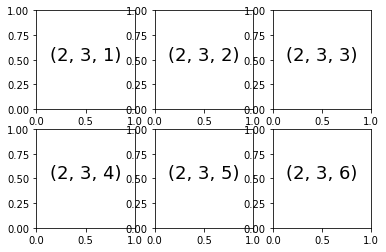

In [3]:
import matplotlib.pyplot as plt

for i in range(1,7) :
  plt.subplot(2,3,i)
  plt.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')

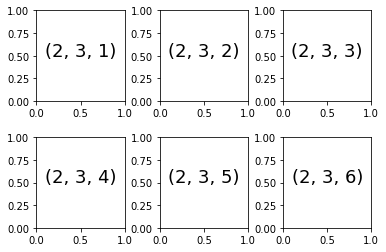

In [4]:
fig = plt.figure()

# subplots_adjust : 플롯들 사이의 간격을 조정
fig.subplots_adjust(hspace=0.4, wspace=0.4) # 이 경우 간격은 서브플롯의 너비와 높이의 40% 설정

for i in range(1,7) :
  plt.subplot(2,3,i)
  plt.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')

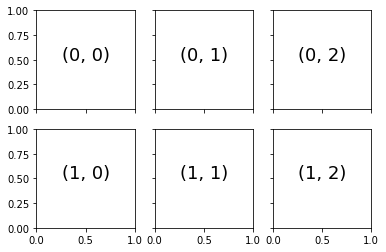

In [10]:
# 같은 행의 모든 축이 y축의 척도를 공유
# 같은 열의 모든 축이 x축의 척도를 공유
fig, ax=plt.subplots(2, 3, sharex='col', sharey='row')

for i in range(2):
  for j in range(3):
    ax[i,j].text(0.5, 0.5, str((i,j)), fontsize=18, ha='center')

# plt.GridSpec() : 복잡한 배치

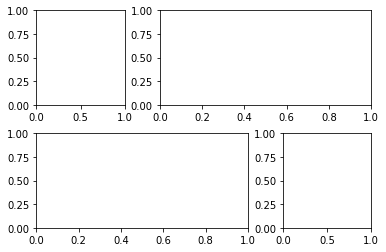

In [11]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

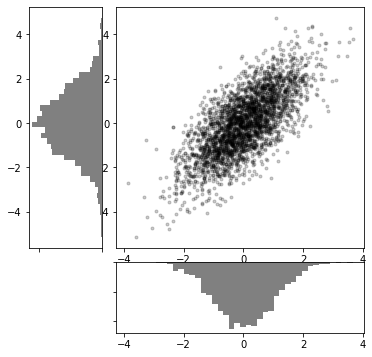

In [18]:
# 다중 축 히스토그램을 만들 때 주로 사용됨
# 정규분포 데이터 만들기
import random
import numpy as np

mean = [0,0]
cov = [[1,1], [1,2]]
x,y = np.random.multivariate_normal(mean, cov, 3000).T

# gridspec 축 설정
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 메인 축 점 산포
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 보조 축상에 히스토드램
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# 주석과 화살표와 텍스트

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  from ipykernel import kernelapp as app


[Text(0, 0.5, 'average daily births'),
 Text(0.5, 1.0, 'USA births by day of year (1969-1988)')]

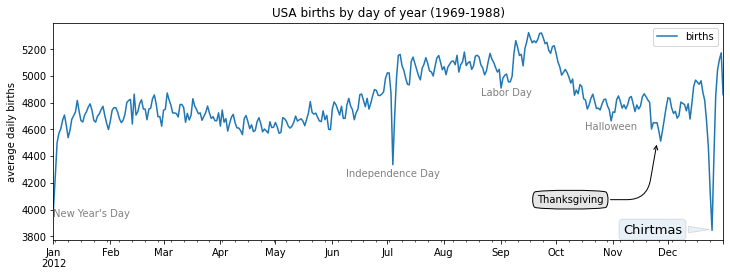

In [35]:
# 예제 미국 출생률에 휴일이 미치는 영향
import pandas as pd
import datetime

births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig=quartiles[1], 0.74 * (quartiles[2]-quartiles[0])
births = births.query('(births > @mu -5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 *births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax=plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

# 플롯에 레이블 추가
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='center', **style)

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data', xytext=(-120,-60), textcoords='offset points', 
            bbox=dict(boxstyle="round4, pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle='->', connectionstyle="angle, angleA=0, angleB=80, rad=20"))

ax.annotate('Chirtmas', xy=('2012-12-25', 3850), xycoords='data', xytext=(-30,0), textcoords='offset points',
            size=13, ha='right', va='center', bbox=dict(boxstyle="round", alpha=0.1), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# 축에 레이블 추가
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# 3차원 플로팅하기

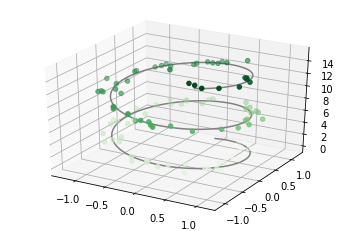

In [41]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

# 3차원 선을 위한 데이터
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline, 'gray')

# 3차원 산점도를 위한 데이터
zdata = 15*np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'z')

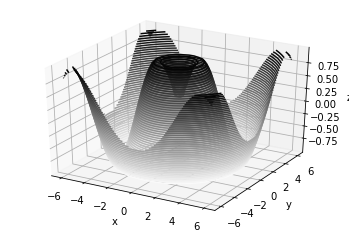

In [43]:
# 3차원 등고선 플롯
def f(x,y) :
  return np.sin(np.sqrt(x**2+y**2))

x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)

X,Y = np.meshgrid(x,y)
Z=f(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

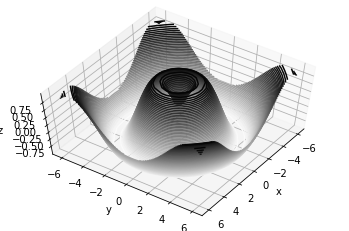

In [44]:
# 고도와 방위각을 설정 / 고도 : x-y평면 위로 이동, 방위각 : z축을 기준으로 시계 반대방향 회전
ax.view_init(60,35)
fig

Text(0.5, 0.92, 'wireframe')

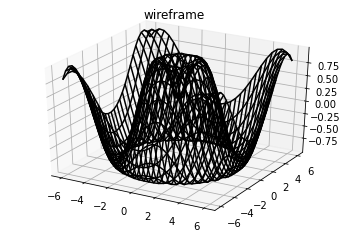

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z, color='black')
ax.set_title('wireframe')

Text(0.5, 0.92, 'surface')

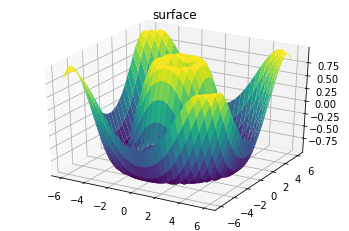

In [49]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

# 페어플롯

In [61]:
import seaborn as sns
irls = sns.load_dataset("iris")
irls.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


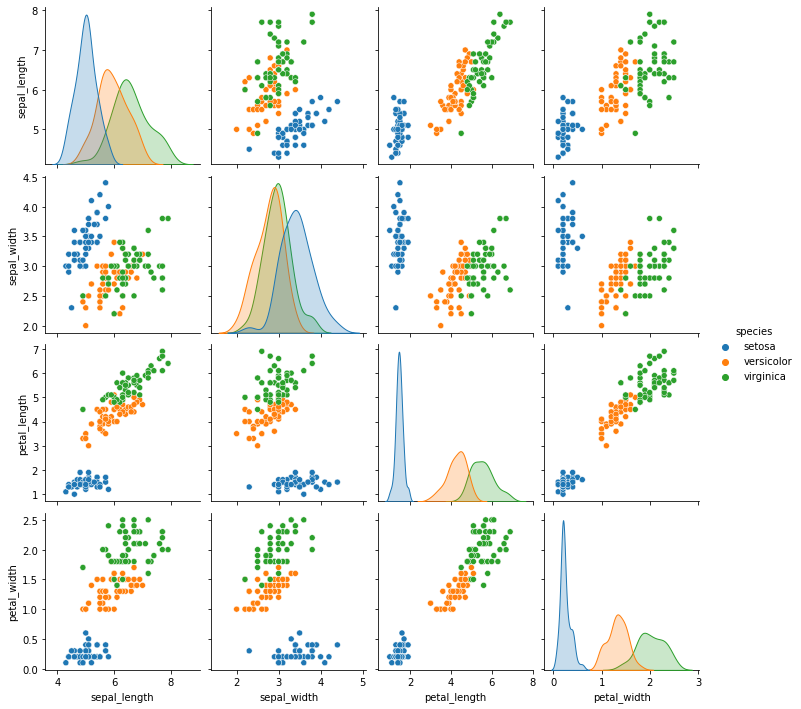

In [62]:
sns.pairplot(irls, hue='species', size=2.5)

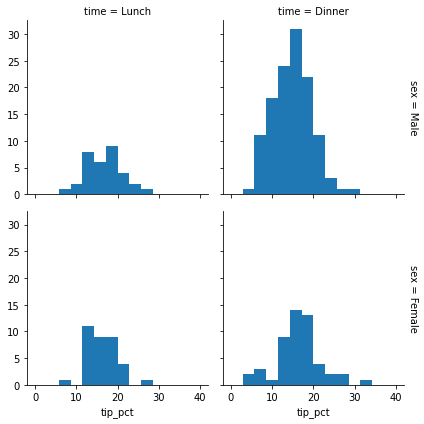

In [64]:
# 다면 히스토그램
tips = sns.load_dataset('tips')
tips.head

tips['tip_pct'] = 100 * tips['tip']/ tips['total_bill']
grid=sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0,40,15))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


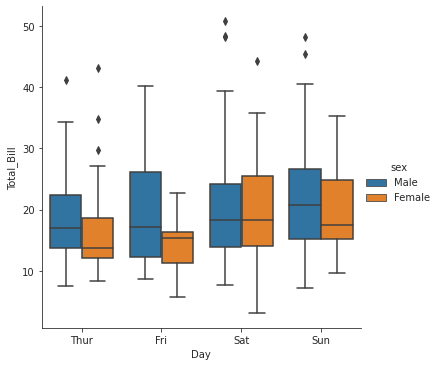

In [67]:
# 요인 플롯 : 구간 내에 어떤 모수의 분포를 볼 수 있음
with sns.axes_style(style='ticks'):
  g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
  g.set_axis_labels('Day', 'Total_Bill')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


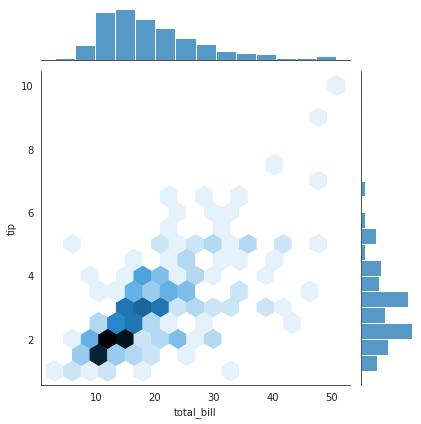

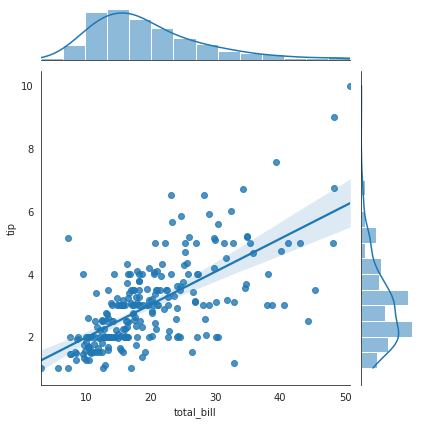

In [70]:
# 결합 분포 : 다양한 데이터 세트간의 결합 분포를 보여줌
with sns.axes_style('white'):
  sns.jointplot('total_bill', 'tip', data=tips, kind='hex')
  # 자동 커널 밀도 추청과 회귀 분석을 수행 할 수 있음
  sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


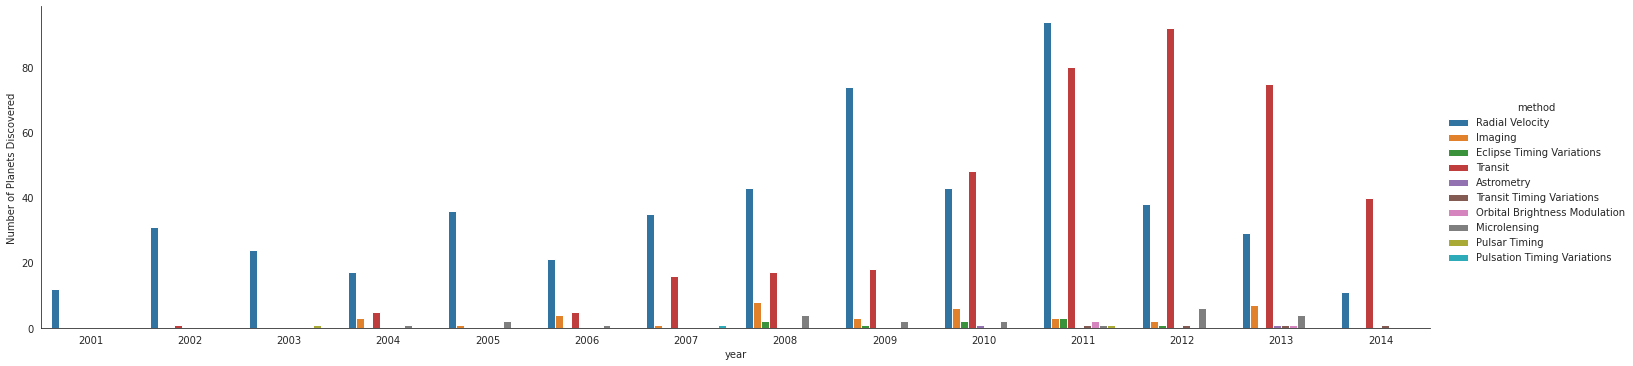

In [71]:
# 막대 플롯
planets = sns.load_dataset('planets')

with sns.axes_style('white'):
  g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                     hue='method', order=range(2001,2015))
  g.set_ylabels("Number of Planets Discovered")